# Análise do Brasileirão de Pontos Corridos

Fonte dos dados: https://www.kaggle.com/macedojleo/campeonato-brasileiro-2003-a-2019

## Pré-Processamento dos Dados

In [2]:
# carrega bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import pandas, numpy as np
import seaborn as sns

In [3]:
# carrega dataset
df = pd.read_csv('novo_campeonato_brasileiro.csv')
df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN


In [4]:
# Cria coluna com clube vencedor
def clube_vencedor(row):
    if row['Vencedor']=='Mandante':
        return row['Equipe_mandante']
    if row['Vencedor']=='Visitante':
        return row['Equipe_visitante']
    else:
        return 'Empate'
    
df['Clube_Vencedor'] = df.apply(clube_vencedor, axis=1)
df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS,Clube_Vencedor
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN,Guarani
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN,Athletico-PR
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN,Empate
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN,Empate
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN,Empate


In [5]:
# Cria coluna com clube derrotado
def clube_derrotado(row):
    if row['Vencedor']=='Mandante':
        return row['Equipe_visitante']
    if row['Vencedor']=='Visitante':
        return row['Equipe_mandante']
    else:
        return 'Empate'
    
df['Clube_Derrotado'] = df.apply(clube_derrotado, axis=1)
df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,Vencedor,Arena,OBS,Clube_Vencedor,Clube_Derrotado
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,Mandante,Brinco de Ouro,NaN,Guarani,Vasco
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,Mandante,Arena da Baixada,NaN,Athletico-PR,Grêmio
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,Empate,Maracanã,NaN,Empate,Empate
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,Empate,Serra Dourada,NaN,Empate,Empate
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,Empate,Beira-Rio,NaN,Empate,Empate


In [6]:
# cria coluna de gols do vencedor e derrotado (usaremos para calcular saldo de gols dos times)
def gols_vencedor(row):
    if row['Vencedor']=='Mandante':
        return row['Gols_mandante']
    if row['Vencedor']=='Visitante':
        return row['Gols_visitante']
    
df['gols_vencedor'] = df.apply(gols_vencedor, axis=1)

def gols_derrotado(row):
    if row['Vencedor']=='Mandante':
        return row['Gols_visitante']
    if row['Vencedor']=='Visitante':
        return row['Gols_mandante']
    
df['gols_derrotado'] = df.apply(gols_derrotado, axis=1)

def gols_empate(row):
    if row['Vencedor']=='Empate':
        return row['Gols_mandante']
    
df['gols_empate'] = df.apply(gols_empate, axis=1)

df['dif_gols'] = df['gols_vencedor']-df['gols_derrotado']
df['total_gols'] = df['Gols_mandante']+df['Gols_visitante']

## Mando de campo faz diferença?

Mandante     3488
Empate       1795
Visitante    1603
Name: Vencedor, dtype: int64

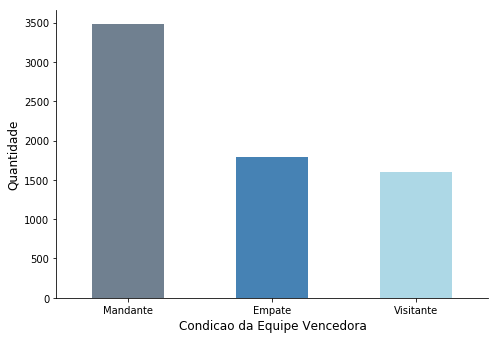

In [7]:
# Jogar em casa tem correlação com a vitória?

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

# Não sei escolher cor. Dá para usar outras paletas:
# https://matplotlib.org/tutorials/colors/colormaps.html
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# Voce poderia gerar cores com uma das opcoes abaixo

# Opcao 1:
# cmap = plt.get_cmap('tab10')
# colors = [cmap(i) for i in np.linspace(.10, .75, 3)]

# Opcao 2
# cores = np.random.rand(3)
# colors = [cmap(i) for i in (cores[0],cores[1],cores[2])]

# Mas vamos na mão mesmo:
df['Vencedor'].value_counts().plot(kind='bar', color=['slategray','steelblue', 'lightblue'], width=.5, rot=0);

ax.set_xlabel('Condicao da Equipe Vencedora', fontsize=12);
ax.set_ylabel('Quantidade', fontsize=12);
#ax.set_title('Condicao do Vencedor', fontsize=18);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Voce pode colocar os valores no grafico (nao testei, mas deve funcionar):
#y = df.groupby('Vencedor')['ID'].count().sort_values(ascending=False)

#for i in range(len(y)):
#    ax.text(0+2*.5, y[i],str(y[i]), color='blue', fontweight='bold')

df['Vencedor'].value_counts()

In [577]:
df[['Gols_mandante','Gols_visitante']].describe()

,Gols_mandante,Gols_visitante
count,6886.000000,6886.000000
mean,1.577694,1.029335
std,1.247215,1.030689
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,7.000000,7.000000


Sim, parece que mando de campo é bem importante. Os mandantes possuem muito mais vitórias que os visitantes e média de gol ~60% maior.

## Quem foram os maiores vencedores? E perdedores?

In [9]:
# qual clube tem mais vitórias na história dos pontos corridos? (top10)
df['Clube_Vencedor'].value_counts()[1:10]

São Paulo        309
Cruzeiro         293
Santos           291
Flamengo         275
Internacional    272
Grêmio           269
Corinthians      268
Fluminense       252
Athletico-PR     251
Name: Clube_Vencedor, dtype: int64

In [10]:
# qual clube tem mais derrotas? (Precisa ainda checar proporcionalmente)
df['Clube_Derrotado'].value_counts()[1:10]

Fluminense      235
Athletico-PR    228
Cruzeiro        222
Atlético-MG     217
Botafogo-RJ     213
Santos          205
Flamengo        203
Vasco           200
Grêmio          199
Name: Clube_Derrotado, dtype: int64

In [600]:
# E nos últimos 10 anos?
df[df['Ano']>2009]['Clube_Derrotado'].value_counts()[1:10]

Fluminense      133
Botafogo-RJ     127
Atlético-MG     126
Cruzeiro        124
Athletico-PR    121
Santos          118
São Paulo       116
Palmeiras       108
Flamengo        108
Name: Clube_Derrotado, dtype: int64

## Estamos ficando mais retranqueiros?

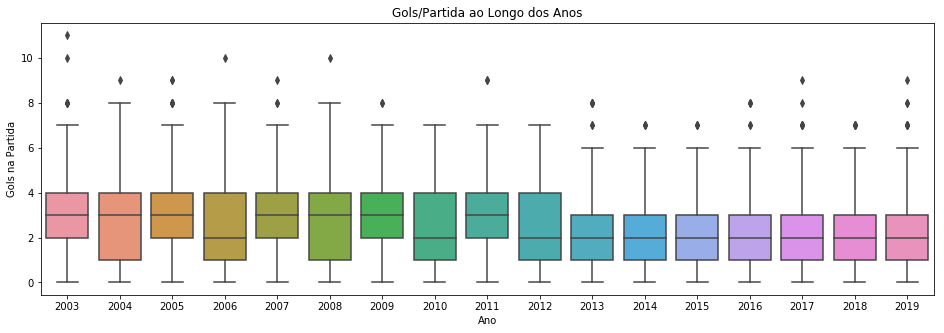

In [8]:
# Como variou a quantidade de gols por partida ao longo dos anos?
plt.figure(figsize=(16,5))
sns.boxplot(x="Ano", y="total_gols",data=df).set(
    xlabel='Ano', 
    ylabel='Gols na Partida',
    title = 'Gols/Partida ao Longo dos Anos');

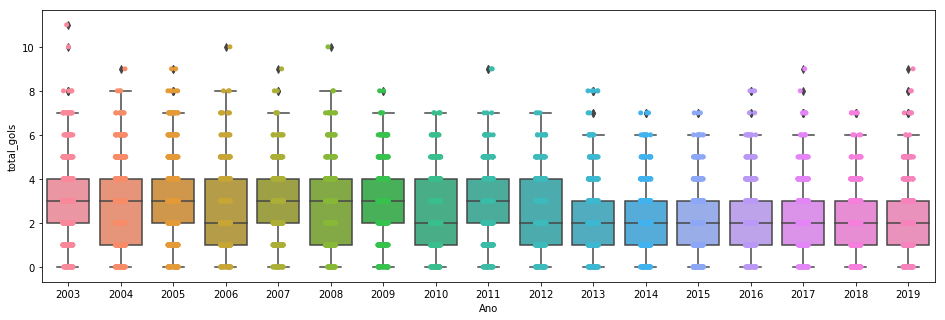

In [14]:
plt.figure(figsize=(16,5))
ax = sns.boxplot(x="Ano", y="total_gols", data=df)
ax = sns.stripplot(x="Ano", y="total_gols", data=df, jitter=True, edgecolor="gray")

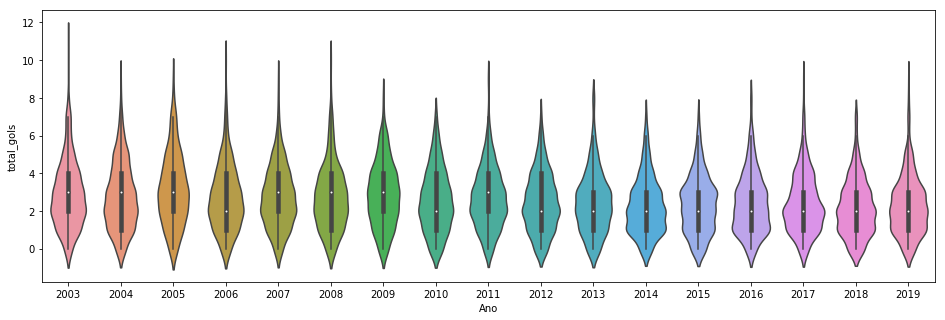

In [20]:
# violin plot (for no reason haha)
plt.figure(figsize=(16,5))
sns.violinplot(x="Ano", y="total_gols", data=df);

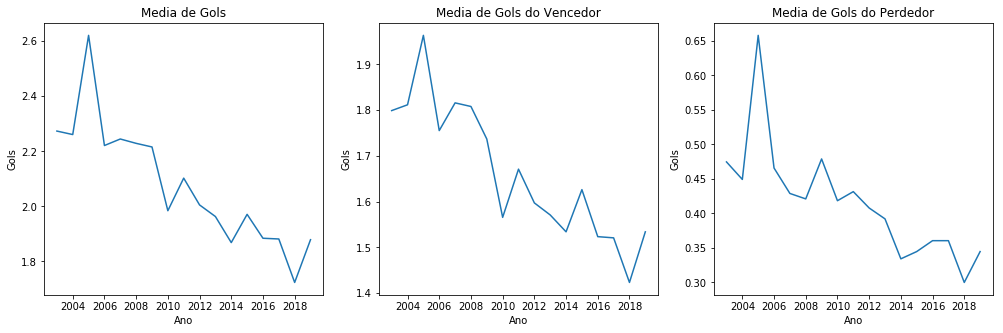

In [482]:
# Como evoluiu a media de gols?
df_gols = df.groupby(['Ano']).agg({'gols_vencedor':'sum','gols_derrotado':'sum','Data':'count','dif_gols':'mean'})
df_gols['media_gols']= (df_gols['gols_vencedor']+df_gols['gols_derrotado'])/df_gols['Data']
df_gols['media_vencedor']= df_gols['gols_vencedor']/df_gols['Data']
df_gols['media_perdedor']= df_gols['gols_derrotado']/df_gols['Data']

plt.figure(figsize=(17,5))
plt.subplot(131)
plt.plot(df_gols['media_gols'])
plt.title('Media de Gols')
plt.xlabel('Ano')
plt.ylabel('Gols')

plt.subplot(132)
plt.plot(df_gols['media_vencedor'])
plt.title('Media de Gols do Vencedor')
plt.xlabel('Ano')
plt.ylabel('Gols')

plt.subplot(133)
plt.plot(df_gols['media_perdedor'])
plt.title('Media de Gols do Perdedor')
plt.xlabel('Ano')
plt.ylabel('Gols');

#df_gols

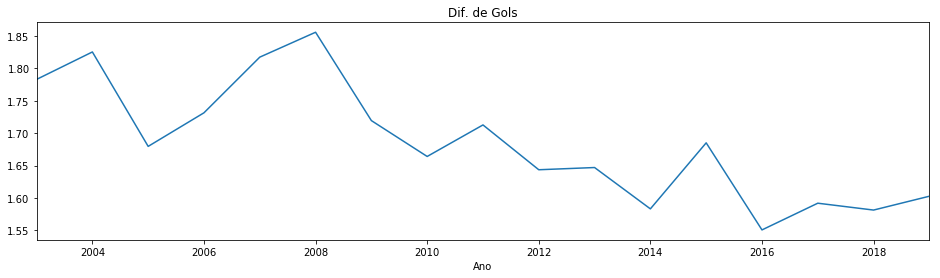

In [570]:
import seaborn as sns

plt.figure(figsize=(16,4))
#sns.boxplot(x='Ano', y='dif_gols', data=df)

#df[['total_gols','dif_gols', 'gols_vencedor', 'gols_derrotado']].describe()
plt.title('Dif. de Gols')
df.groupby('Ano')['dif_gols'].mean().plot(kind='line'); #evolucao da diferenca de gols ao longo do tempo

#df_teste.plot(x='Ano', y='dif_gols', data=df_teste, kind='bar')
#plt.plot(x='Ano', y='dif_gols', data=df_testeplt.plot(x='Ano', y='dif_gols', data=df_teste')
df.groupby(')

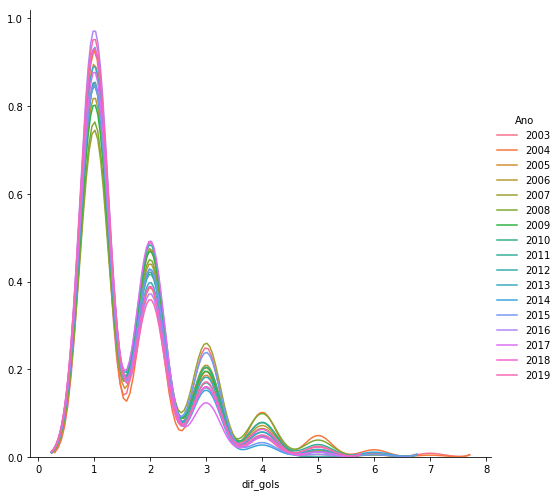

In [31]:
# Esse grafico é legal, mas seria melhor reduzir a quantidade de anos
sns.FacetGrid(df, hue="Ano", size = 7) \
   .map(sns.kdeplot, "dif_gols") \
   .add_legend();

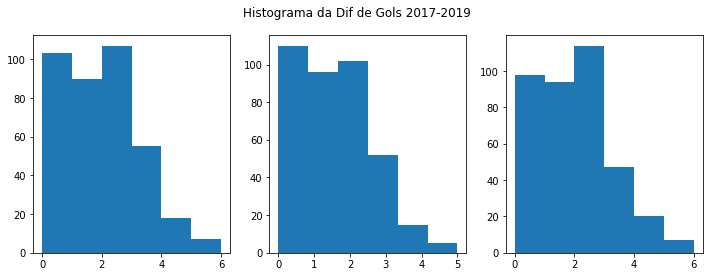

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(df[df['Ano']==2017]['gols_vencedor'].fillna(0), bins=6)

plt.subplot(132)
plt.hist(df[df['Ano']==2018]['gols_vencedor'].fillna(0), bins=6)

plt.subplot(133)
plt.hist(df[df['Ano']==2019]['gols_vencedor'].fillna(0), bins=6)

plt.suptitle('Histograma da Dif de Gols 2017-2019');

# grafico nao ficou legal... mas vamos deixar aqui, vai que alguem aproveita o codigo

Vencedor,Empate,Mandante,Visitante,% Empate
Ano,,,,
2003,142,297,113,25.724638
2004,140,288,124,25.362319
2005,103,235,124,22.294372
2006,97,191,92,25.526316
2007,90,192,98,23.684211
2008,96,208,76,25.263158
2009,102,195,83,26.842105
2010,118,179,83,31.052632
2011,105,184,91,27.631579


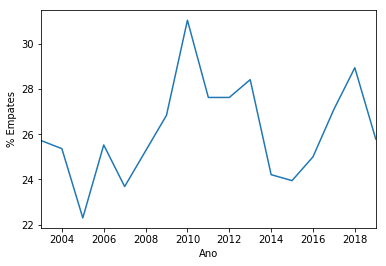

In [598]:
# Como evoluiu o empate em questão de representatividade?
df_result = pd.crosstab(df['Ano'],df['Vencedor'])
df_result['% Empate']= df_result['Empate']/(df_result['Empate']+df_result['Mandante']+df_result['Visitante'])*100
df_result['% Empate'].plot();
plt.ylabel('% Empates');
df_result

## Segundo Pré-Processamento

In [483]:
# Montando a base na visão clube
clubes_vencedores = pd.DataFrame({'Clubes':df.groupby('Clube_Vencedor')['gols_vencedor'].sum().sort_values(ascending=False).index,
                                 'Gols':df.groupby('Clube_Vencedor')['gols_vencedor'].sum().sort_values(ascending=False)})
clubes_derrotados = pd.DataFrame({'Clubes':df.groupby('Clube_Derrotado')['gols_derrotado'].sum().sort_values(ascending=False).index,
                                 'Gols':df.groupby('Clube_Derrotado')['gols_derrotado'].sum().sort_values(ascending=False)})

df_clubes = pd.concat([clubes_vencedores, clubes_derrotados]).groupby(["Clubes"], as_index=False)["Gols"].sum().sort_values(by='Gols',ascending=False).reset_index()
df_clubes = df_clubes[['Clubes','Gols']]


In [484]:
# Como lidar com os gols de empate?
# Talvez não seja a melhor forma, se alguém quiser melhorar, manda bala!

def clube_vencedor_empate(row): # vencedor recebe o mandante
    if row['Vencedor']=='Empate':
        return row['Equipe_mandante']
    
def clube_derrotado_empate(row): # vencedor recebe o mandante
    if row['Vencedor']=='Empate':
        return row['Equipe_visitante']
    
df['Clube_Empate_Mandante'] = df.apply(clube_vencedor_empate, axis=1)
df['Clube_Empate_Visitante'] = df.apply(clube_derrotado_empate, axis=1)

df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,...,OBS,Clube_Vencedor,Clube_Derrotado,gols_vencedor,gols_derrotado,gols_empate,dif_gols,total_gols,Clube_Empate_Mandante,Clube_Empate_Visitante
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,...,NaN,Guarani,Vasco,4.0,2.0,NaN,2.0,6,None,None
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,...,NaN,Athletico-PR,Grêmio,2.0,0.0,NaN,2.0,2,None,None
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,...,NaN,Empate,Empate,NaN,NaN,1.0,NaN,2,Flamengo,Coritiba
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,...,NaN,Empate,Empate,NaN,NaN,2.0,NaN,4,Goiás,Paysandu
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,...,NaN,Empate,Empate,NaN,NaN,1.0,NaN,2,Internacional,Ponte Preta


In [506]:
# agora criamos os campos dos gols 
# Melhor que o que foi sugerido antes: dá pra criar só atribuindo os gols do mandante e visitante 
# para o campo gols_vencedor_empate e gols_derrotado_empate
df.loc[df['Vencedor'] == 'Empate', 'gols_empate_mandante'] = df['Gols_mandante']
df.loc[df['Vencedor'] == 'Empate', 'gols_empate_visitante'] = df['Gols_mandante']

df.head()

,ID,Data,Ano,Rodada,Equipe_mandante,Equipe_visitante,Gols_mandante,Gols_visitante,Mandante_UF,Visitante_UF,...,Clube_Derrotado,gols_vencedor,gols_derrotado,gols_empate,dif_gols,total_gols,Clube_Empate_Mandante,Clube_Empate_Visitante,gols_empate_mandante,gols_empate_visitante
0,2003.01.0001,29/03/2003,2003,1,Guarani,Vasco,4,2,SP,RJ,...,Vasco,4.0,2.0,NaN,2.0,6,None,None,NaN,NaN
1,2003.01.0002,29/03/2003,2003,1,Athletico-PR,Grêmio,2,0,PR,RS,...,Grêmio,2.0,0.0,NaN,2.0,2,None,None,NaN,NaN
2,2003.01.0003,30/03/2003,2003,1,Flamengo,Coritiba,1,1,RJ,PR,...,Empate,NaN,NaN,1.0,NaN,2,Flamengo,Coritiba,1.0,1.0
3,2003.01.0004,30/03/2003,2003,1,Goiás,Paysandu,2,2,GO,PA,...,Empate,NaN,NaN,2.0,NaN,4,Goiás,Paysandu,2.0,2.0
4,2003.01.0005,30/03/2003,2003,1,Internacional,Ponte Preta,1,1,RS,SP,...,Empate,NaN,NaN,1.0,NaN,2,Internacional,Ponte Preta,1.0,1.0


In [517]:
clubes_empates_mandantes = pd.DataFrame({'Clubes':df.groupby('Clube_Empate_Mandante')['gols_empate_mandante'].sum().sort_values(ascending=False).index,
                                 'Gols':df.groupby('Clube_Empate_Mandante')['gols_empate_mandante'].sum().sort_values(ascending=False)})
clubes_empates_visitantes = pd.DataFrame({'Clubes':df.groupby('Clube_Empate_Visitante')['gols_empate_visitante'].sum().sort_values(ascending=False).index,
                                 'Gols':df.groupby('Clube_Empate_Visitante')['gols_empate_visitante'].sum().sort_values(ascending=False)})

clubes_empates_mandantes=clubes_empates_mandantes.reset_index().drop(columns='Clube_Empate_Mandante')
clubes_empates_visitantes=clubes_empates_visitantes.reset_index().drop(columns='Clube_Empate_Visitante')


,Clubes,Gols
0,Flamengo,107.0
1,Atlético-MG,101.0
2,Fluminense,95.0
3,Corinthians,89.0
4,Santos,87.0


In [525]:
# Agora joins mais uma vez com os groupby
# traz os gols de quando clube empatou sendo mandante

df_clubes_2 = pd.concat([df_clubes, clubes_empates_mandantes]).groupby(["Clubes"], 
                                                              as_index=False)["Gols"].sum().sort_values(by='Gols',ascending=False).reset_index()


df_clubes_2 = pd.concat([df_clubes_2, clubes_empates_visitantes]).groupby(["Clubes"], 
                                                              as_index=False)["Gols"].sum().sort_values(by='Gols',ascending=False).reset_index()

df_clubes_2 = df_clubes_2[['Clubes','Gols']]

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [540]:
# E gols por jogo?
# Vamos trazer o numero de jogos
clubes_jogos = pd.DataFrame({'Clubes':df.groupby('Equipe_mandante')['Equipe_mandante'].count().sort_values(ascending=False).index,
                                 'Jogos':df.groupby('Equipe_mandante')['Equipe_mandante'].count().sort_values(ascending=False)})

clubes_jogos['total_jogos']= clubes_jogos['Jogos']*2

## Quais os clubes mais goleadores?

In [608]:
# agora trazemos o numero de jogos para nossa base na visao clube
df_clubes_3 = pd.merge(df_clubes_2,
         clubes_jogos[['Clubes','total_jogos']],
         on='Clubes',
         how='left')

df_clubes_3['media_gols'] = df_clubes_3['Gols']/df_clubes_3['total_jogos']
df_clubes_3[df_clubes_3['total_jogos']>300].sort_values(by='media_gols', ascending=False)
df_clubes_3[df_clubes_3['total_jogos']>300].sort_values(by='Gols', ascending=False)

,Clubes,Gols,total_jogos,media_gols
0,Santos,1008.0,666.0,1.513514
1,Cruzeiro,978.0,666.0,1.468468
2,São Paulo,978.0,666.0,1.468468
3,Flamengo,916.0,664.0,1.379518
4,Atlético-MG,903.0,628.0,1.437898
5,Fluminense,891.0,666.0,1.337838
6,Grêmio,859.0,624.0,1.376603
7,Athletico-PR,855.0,628.0,1.361465
8,Palmeiras,838.0,582.0,1.439863
9,Internacional,833.0,628.0,1.326433
